In [5]:
import numpy as np
from VanillaOption import VanillaOption

In [9]:
o = VanillaOption(105., 1.0, 0)
maturities = np.linspace(0.05, 2.0, 20)
strikes = np.linspace(80, 120, 20)
T, K = np.meshgrid(strikes, maturities)
C = np.zeros_like(K)
V = np.zeros_like(C)
S = 100
r = 0.05
q = 0
sigma = 0.3
for t in enumerate(maturities):
    for k in enumerate(strikes):
        o.T = t[1]
        o.K = k[1]
        C[t[0], k[0]] = o.bs_value(S, r, q, sigma)
        V[t[0], k[0]] = o.bs_vega(S, r, q, sigma)

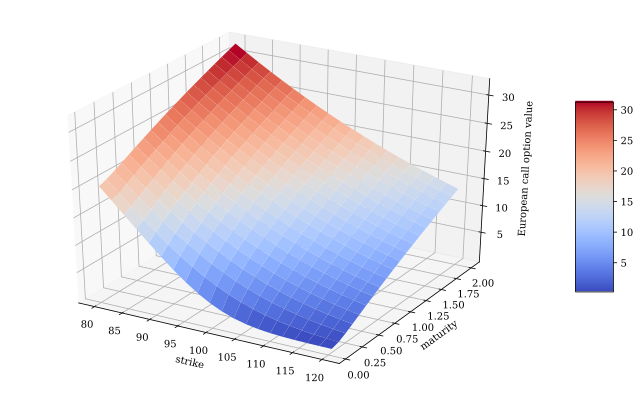

In [10]:
from pylab import cm, mpl, plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 7))
surf = ax.plot_surface(T, K, C, rstride=1, cstride=1,
            cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('European call option value')
fig.colorbar(surf, shrink=0.5, aspect=5);

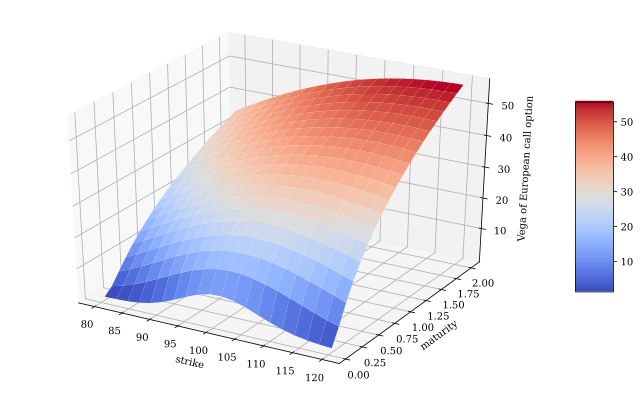

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 7))
surf = ax.plot_surface(T, K, V, rstride=1, cstride=1,
            cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('Vega of European call option')
fig.colorbar(surf, shrink=0.5, aspect=5);